# 04 텍스트 마이닝 ③: 데이터 시각화_심화 학습 자료(2022. 12. 1.(목))

<span style="color:red"><strong>
    ※ 무단 배포, 공유, 수정, 편집 금지 ⓒ선한빛
        </strong></span>

### 1. 데이터 시각화
#### 1) 정의
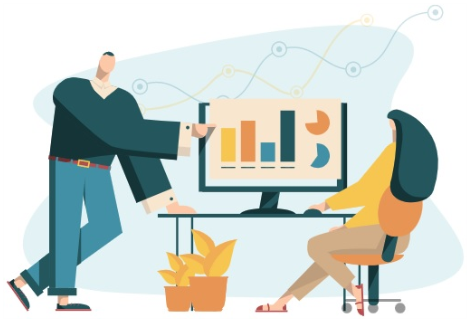
<p>● 데이터를 표, 그래프, 그림과 같은 시각적인 요소들을 사용하여 쉽게 이해할 수 있도록 표현하는 방법 또는 기술.</p>

#### 2) 종류
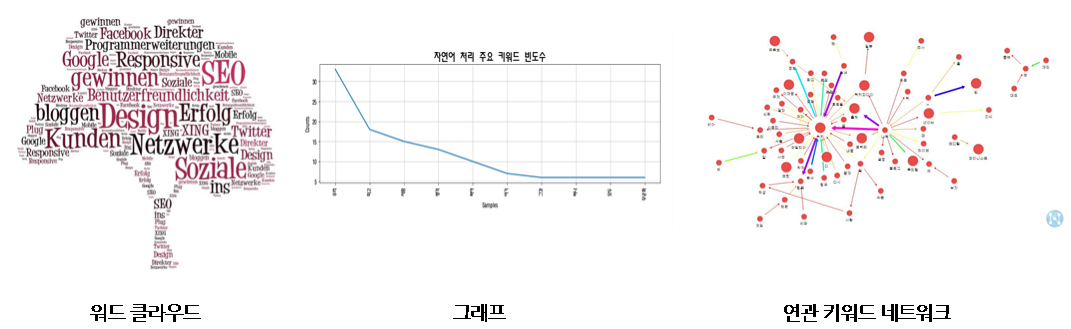

#### 3) 도구
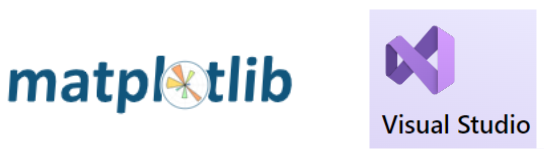
<p>● matplotlib: 데이터 시각화와 그래프 플롯을 위해 이용하는 라이브러리.</p>
<p>● Visual Studio: 비주얼 베이직, 비주얼 C++, 비주얼 C# 등 다양한 언어로 프로그래밍을 할 수 있게 도와 주는 개발 환경.</p>

### 2. 워드 클라우드(wordcloud)
#### 1) 정의
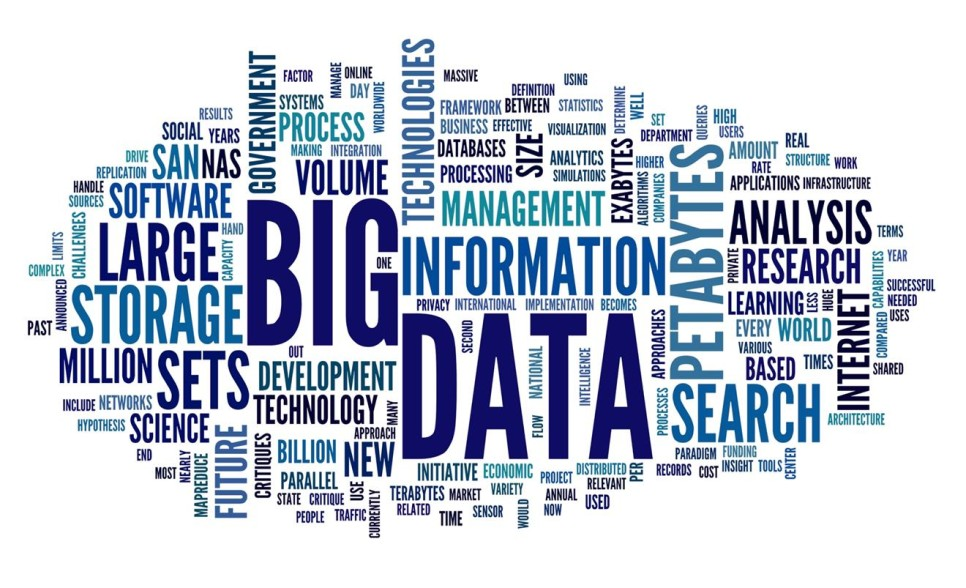
<p>● <span style='background-color: #fff5b1'>자주 나타나는 단어(≒핵심어, 주요 키워드)</span>를 크게 보여줘 직관적으로 텍스트를 알려 주는 기능</p>

#### 2) 특징
<p>● 시각화 도구 <span style='background-color: #fff5b1'>가장 많이 활용됨.</span></p>
<p>● 빈도가 높은 단어는 크게, 빈도가 낮은 단어는 작게 보여줌.</p>
<p>● 글씨의 크기로 전체적인 현황을 한눈에 파악할 수 있음.</p>

### 3. 실습
#### 1) 자연어 처리
<span style="color:#0000ff">1단계. NLTK 실행하기</span>

In [ ]:
import nltk
nltk.download()

<span style="color:#0000ff">2단계. KoNLPy 실행하기</span>

In [ ]:
#방법 1
from konlpy.tag import Hannanum
hannanum=Hannanum()

In [ ]:
#방법 1을 했을 때 Kernel이 죽었다는 알림이 뜨면 이 코드로 실행하세요.
import konlpy
hannanum=konlpy.tag.Hannanum()

<span style="color:#0000ff">3단계. 한글 텍스트 불러오기</span>

In [ ]:
novel=open('C:\Temp\운수좋은날.txt', encoding='UTF-8').read()
print(novel)

<span style="color:#0000ff">4단계. 명사 추출하기</span>

In [ ]:
novel_noun=hannanum.nouns(novel)
print(novel_noun)

<span style="color:#0000ff">5단계. 추출한 명사의 개수 확인하기</span>

In [ ]:
print(len(novel_noun))

<span style="color:#0000ff">6단계. 불용어 사전 불러오기</span>

In [ ]:
wrong=open('C:\Temp\불용어 사전.txt', encoding='UTF-8').read()
print(wrong)

<span style="color:#0000ff">7단계. 불용어에 해당하는 명사 목록 추출하기</span>

In [ ]:
stop=[i for i in novel_noun if i in wrong] 
print(stop)

<span style="color:#0000ff">8단계. 불용어를 제외한 명사 목록 추출하기</span>

In [ ]:
result=[j for j in novel_noun if j not in wrong] 
print(result)

<span style="color:#0000ff">9단계. 글자 수를 제한해 불용어 추가하기</span>

In [ ]:
new_result=[]

for i in result: #불용어에 해당하지 않는 단어를 대상으로 for문 반복
    if len(i)>=2 and len(i)<4: #글자 수가 2자~3자에 해당되는 단어만 추출
        new_result.append(i) #추출한 단어는 new_result에 추가
        
print(new_result)
print(len(new_result))

<span style="color:#0000ff">10단계. 불용어가 제거된 명사들의 빈도 출력하기</span>

In [ ]:
from collections import Counter

count=Counter(new_result)
print(count)

#### 2) 워드 클라우드 생성하기
<span style="color:#0000ff">1단계. 필요한 모듈 불러오기</span>

In [ ]:
from wordcloud import WordCloud

<span style="color:#0000ff">2단계. 워드 클라우드 생성 조건 설정하기</span>

In [ ]:
wc=WordCloud(random_state=1234, #호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
             font_path='C:\Windows\Fonts\malgun.ttf', #글씨체 설정
             relative_scaling='auto', #워드 클라우드에 표현되는 글자의 상대적 비율 설정
             background_color='white',  #배경색 설정
            ).generate_from_frequencies(count) #딕셔너리 데이터 값을 기반으로 워드 클라우드 생성

<span style="color:#0000ff">3단계. matplotlib 실행하기</span>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#아래의 코드에서 #를 삭제하고 실행하면 시각화 결과를 새로운 창에 출력시킬 수 있음.
#%matplotlib qt5 

<span style="color:#0000ff">4단계. 워드 클라우드 출력하기</span>

In [ ]:
plt.rcParams["figure.figsize"]=(14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid']=False  #True는 설정 O, False는 설정 X
fig=plt.figure() #이미지 크기 할당
plt.axis('off') #테두리 선 출력 설정 off
plt.imshow(wc) #이미지를 화면에 출력

<span style="color:#0000ff">6단계. 워드 클라우드 저장하기</span>

In [ ]:
fig.savefig('c:/temp/운수좋은날_주요키워드.png')  #워드 클라우드를 파일로 저장

#### 3) 워드 클라우드 조건 변경하기
##### (1) 출력 모양 변경
<span style="color:#0000ff">1단계. 바꾸고 싶은 모양 그림(png) 확보하기</span>
<p>● Google Image에서 png 그림 찾기</p>

https://www.google.co.kr/search?sxsrf=ALiCzsb85x8lWHhRpCUA2aREqbAGmVU1Bw:1657533367486&source=univ&tbm=isch&q=wordcloud+mask.png&fir=xVbmtyKCCTMJUM%252Cgl0NJKAJNPMagM%252C_%253BxjZ2RKnVPiAmhM%252CGaMPE5AZC7yMFM%252C_%253BcI7K9mPYGaLBAM%252CUGok8JbT50AECM%252C_%253B2NDQ-Egi3gmfAM%252CnNB3QpDxMaFLwM%252C_%253BzyegGixbPyp9TM%252CdAtuvWa5IFVdWM%252C_%253B6u36mSo4wJ370M%252C6WXVZ9ZcW5KwzM%252C_%253BAETvE7nYjkrZxM%252CqWZd1R4He5uQLM%252C_%253BRQQM0-JQk4k5DM%252CShiD5ZJnDxVVjM%252C_%253BfGBXVmLW61WjtM%252CCoCs0g8LmrQy7M%252C_%253BATnXuoa-FiRHGM%252C6WXVZ9ZcW5KwzM%252C_%253BDwlky_-Kakv_AM%252CX1toCOzzUESK5M%252C_%253BkOh1r0Y7LHGODM%252CnNB3QpDxMaFLwM%252C_%253Bq8K6E41dCqGXLM%252COK0Ubskh6OsMCM%252C_%253BXrihrq99Klx7NM%252CShiD5ZJnDxVVjM%252C_%253Be-sZLzbKtELhTM%252CTV-SVJZlvIf06M%252C_&usg=AI4_-kSrs85iEG8XpzNzDJDdXv2wbMAnsw&sa=X&ved=2ahUKEwjF2Mn8yPD4AhUG8WEKHRuHA78Q7Al6BAgREAg&biw=1330&bih=706&dpr=1.25

<p>● Google에서 png 사진을 바로 저장할 경우 오류가 생길 확률이 있음.</p>
<p>● 사진을 캡쳐해서 확장자를 .png로 설정하고 Temp에 저장</p>

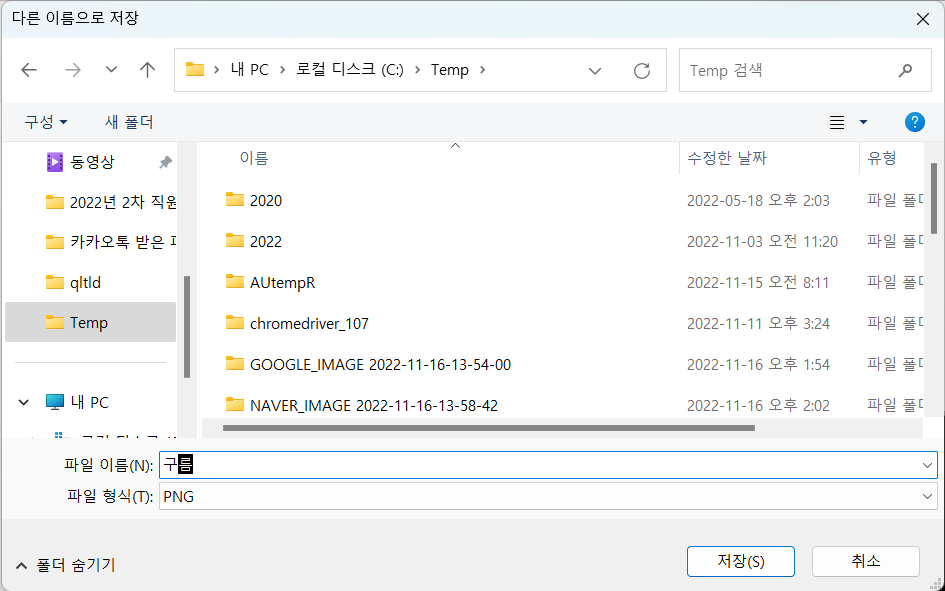

<span style="color:#0000ff">2단계. 실행 환경 구축하기</span>
<p>① numpy</p>

In [ ]:
import numpy as np

② PIL 패키지

In [ ]:
from PIL import Image

<span style="color:#0000ff">3단계. 변경하고 싶은 모양의 사진 불러오기</span>
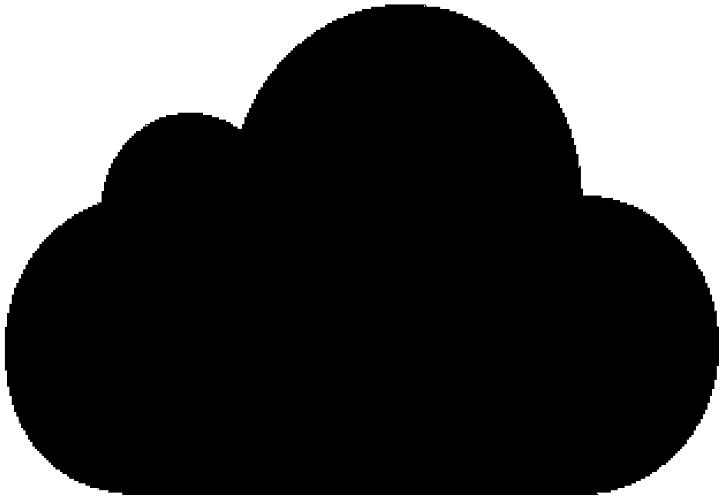

In [ ]:
cloud=np.array(Image.open('C:/Temp/구름.png')) #Image.open(): 사진 파일 불러오기

<span style="color:#0000ff">4단계. 워드 클라우드 생성 조건 변경하기</span>

In [ ]:
wc=WordCloud(random_state=1234,
             font_path='C:\Windows\Fonts\malgun.ttf', #글씨체 설정
             mask=cloud, #이미지 파일 이름으로 바꿔서 쓰기
             relative_scaling='auto', #워드 클라우드에 표현되는 글자의 상대적 비율 설정
             background_color='white',  #배경색 설정
            ).generate_from_frequencies(count) #딕셔너리 데이터 값을 기반으로 워드 클라우드 생성

<span style="color:#0000ff">5단계. 새로운 워드 클라우드 출력하기</span>

In [ ]:
plt.rcParams["figure.figsize"]=(14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid']=False  #True는 설정 O, False는 설정 X

fig=plt.figure() #이미지 크기 할당

plt.axis('off') #x축, y축 출력 설정 off
plt.imshow(wc) #이미지를 화면에 출력

<span style="color:#0000ff">6단계. 워드 클라우드 저장하기</span>

In [ ]:
fig.savefig('c:/temp/운수좋은날_구름.png')  #워드 클라우드를 파일로 저장

##### (2) 글씨체 변경
<span style="color:#0000ff">1단계. 바꾸고 싶은 글씨체 확인하기</span>
<p>● [C:]-[Windows]-[Fonts]에 들어가 바꾸고 싶은 글씨체 찾기</p>

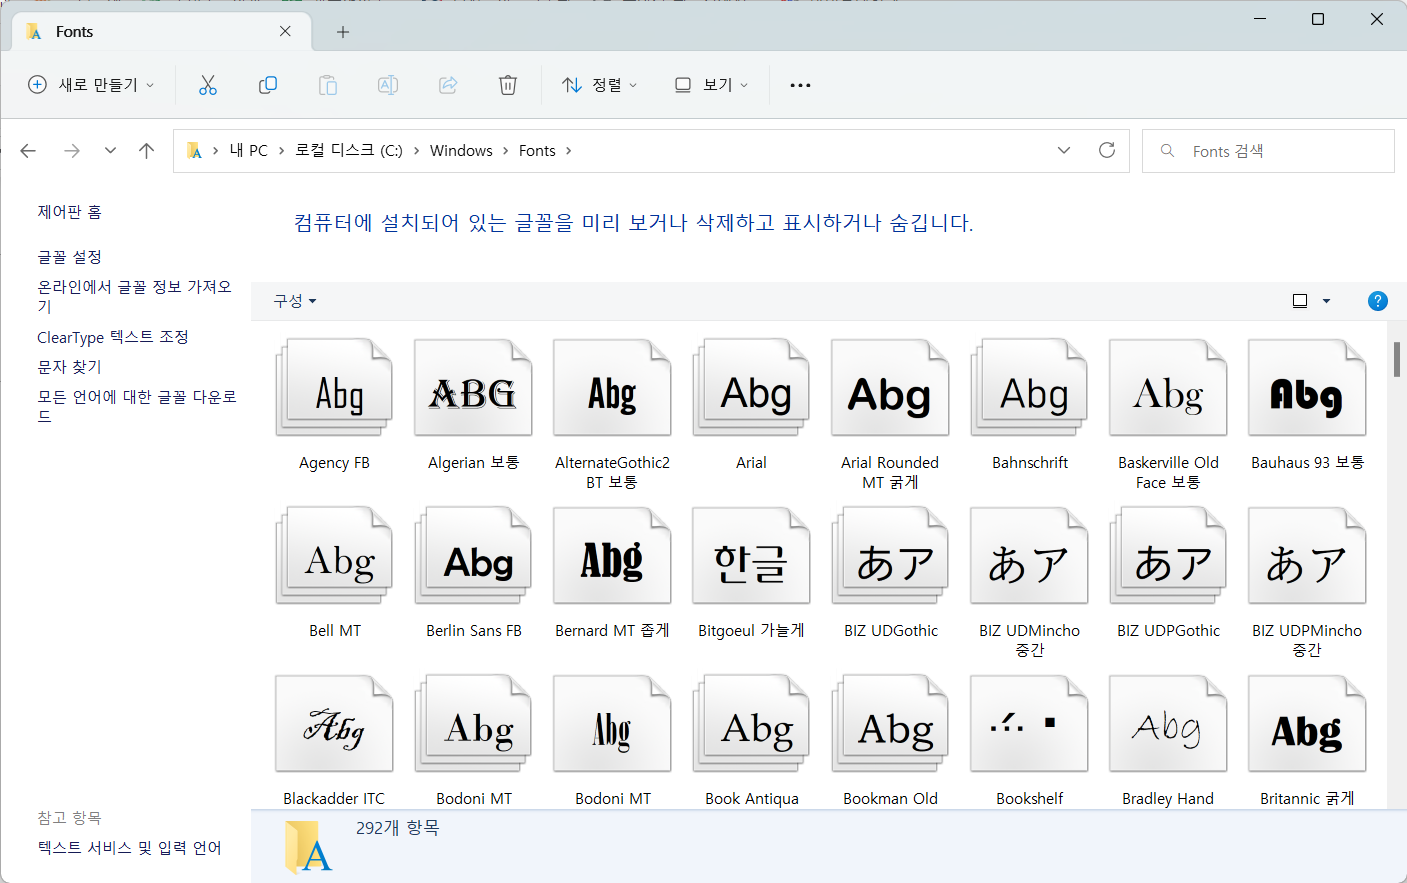

<p>● 원하는 글씨체를 선택한 후 마우스 오른쪽 버튼을 눌러 [속성]으로 들어가기</p>

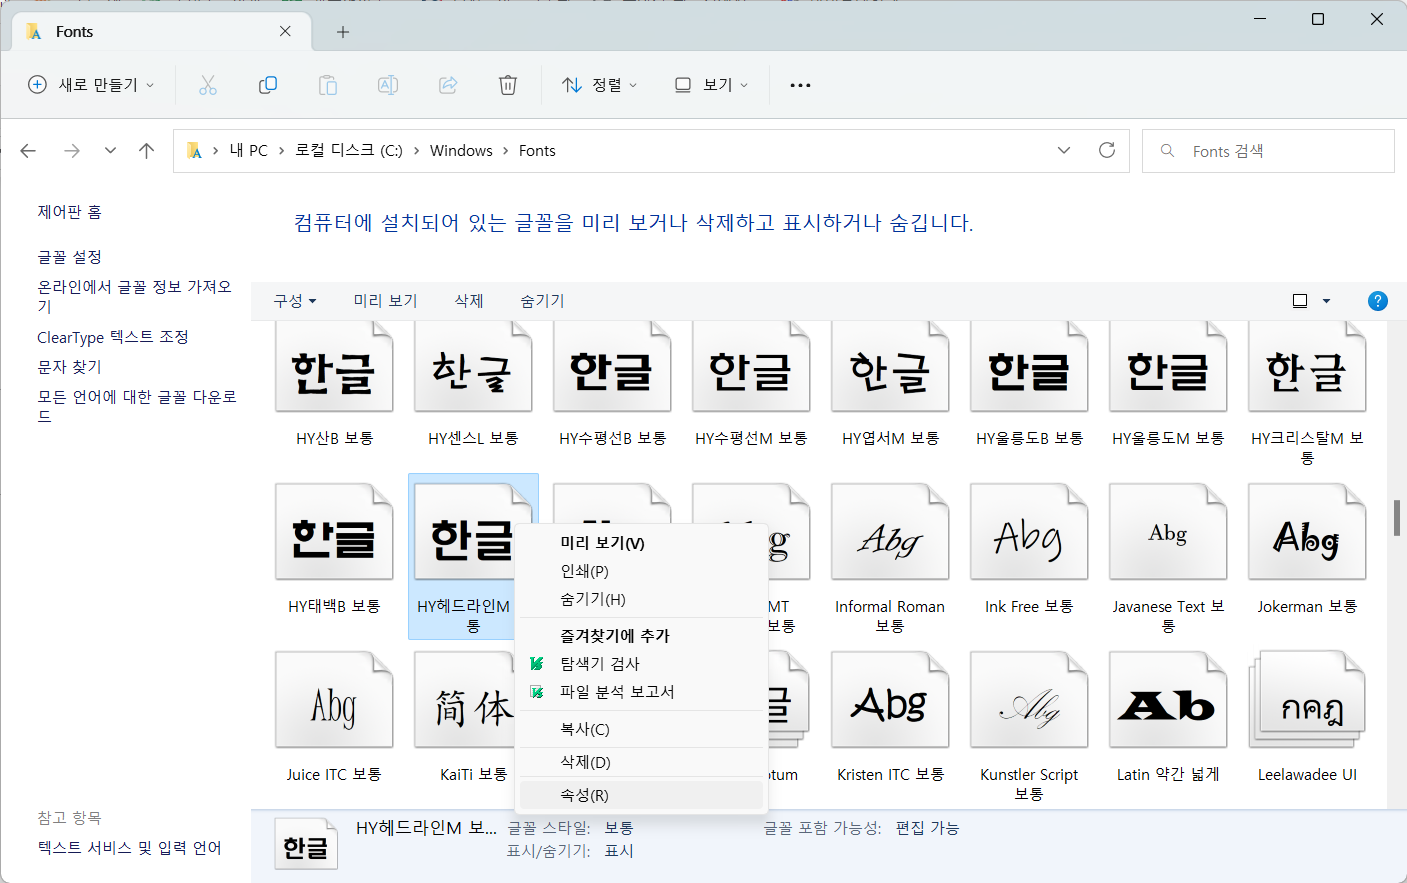

<p>● 글씨체의 영문 이름과 확장자 확인하기</p>

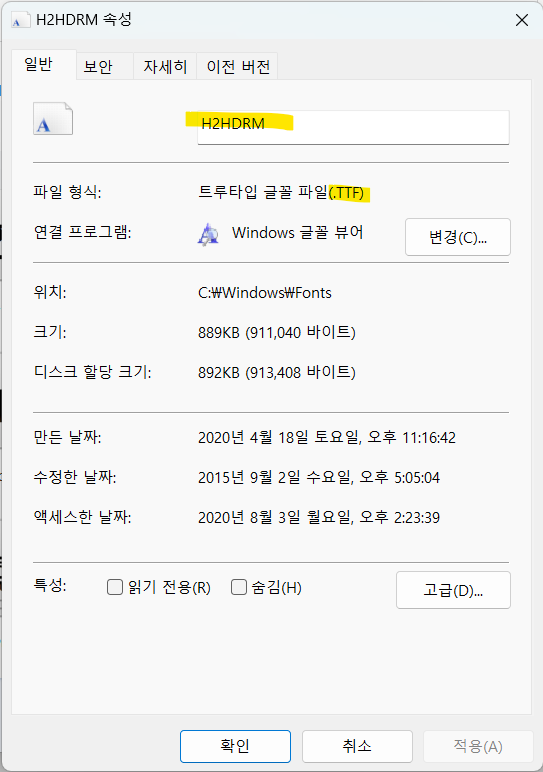

<span style="color:#0000ff">2단계. 글씨체 변경하기</span>
<p>● HY헤드라인M의 영문 이름과 확장자는 H2HDRM.ttf</p>

In [ ]:
wc=WordCloud(random_state=1234,
             font_path='C:\Windows\Fonts\H2HDRM.ttf', #글씨체 설정
             relative_scaling='auto',
             background_color='white',
            ).generate_from_frequencies(count) #딕셔너리 데이터 값을 기반으로 워드 클라우드 생성

<span style="color:#0000ff">3단계. 워드 클라우드 출력하기</span>

In [ ]:
plt.rcParams["figure.figsize"]=(14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid']=False  #True는 설정 O, False는 설정 X
fig=plt.figure() #이미지 크기 할당
plt.axis('off') #테두리 선 출력 설정 off
plt.imshow(wc) #이미지를 화면에 출력

<span style="color:#0000ff">4단계. 워드 클라우드 저장하기</span>

In [ ]:
fig.savefig('c:/temp/운수좋은날_font.png')

##### (3) 글자 색깔 변경
<span style="color:#0000ff">1단계. 바꾸고 싶은 색 확인하기</span>
<p>● matplotlib 홈페이지에 들어가 글자 색 조합명 확인하기</p>

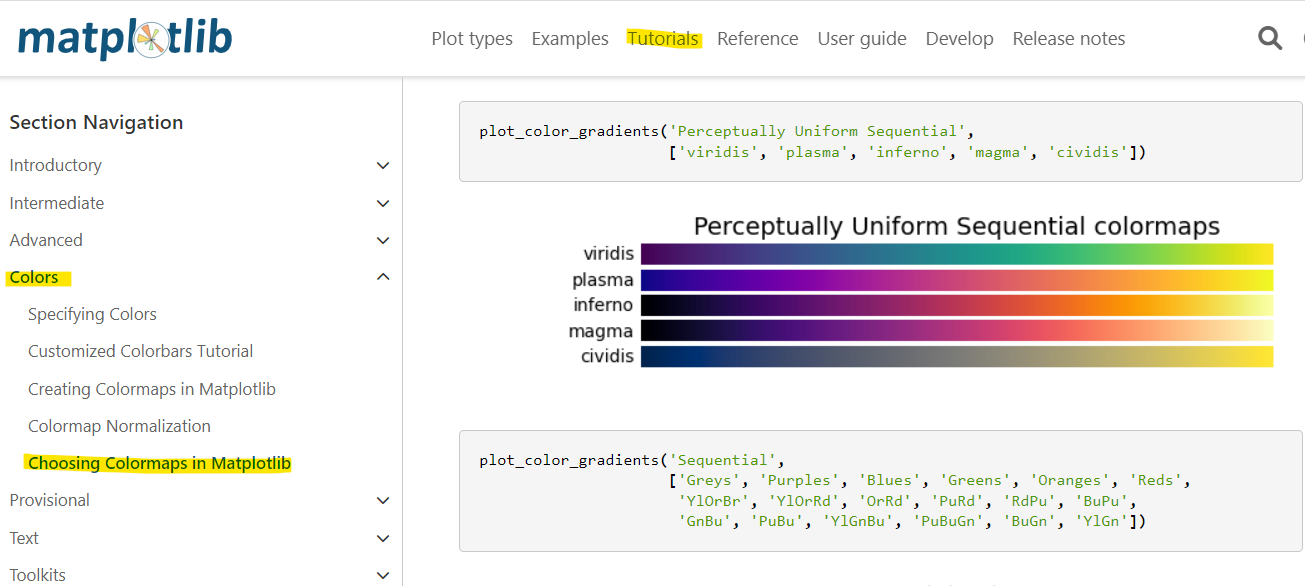

<span style="color:#0000ff">2단계. 원하는 색으로 변경해서 워드 클라우드 생성하기</span>

In [ ]:
wc=WordCloud(random_state=1234, #호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
             font_path='C:\Windows\Fonts\malgun.ttf', #글씨체 설정
             relative_scaling='auto', #워드 클라우드에 표현되는 글자의 상대적 비율 설정
             background_color='white',  #배경색 설정
             colormap='inferno'
            ).generate_from_frequencies(count) #딕셔너리 데이터 값을 기반으로 워드 클라우드 생성

<span style="color:#0000ff">3단계. 워드 클라우드 출력하기</span>

In [ ]:
plt.rcParams["figure.figsize"]=(14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid']=False  #True는 설정 O, False는 설정 X
fig=plt.figure() #이미지 크기 할당
plt.axis('off') #테두리 선 출력 설정 off
plt.imshow(wc) #이미지를 화면에 출력

<span style="color:#0000ff">4단계. 워드 클라우드 저장하기</span>

In [ ]:
fig.savefig('c:/temp/운수좋은날_inferno.png')

#### 4) 그래프 그리기
<span style="color:#0000ff">1단계. 실행 환경 구축하기</span>

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

<span style="color:#0000ff">2단계. 글씨체 설정하기</span>

In [ ]:
font_path='C:\Windows\Fonts\malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name() 

matplotlib.rc('font',family=font_name)

<span style="color:#0000ff">3단계. NLTK를 활용해 plot 그래프 생성하기

In [ ]:
from nltk.probability import FreqDist 

final_hannanum_sort_dic_graph=FreqDist(count) 

<span style="color:#0000ff">4단계. 그래프 출력하기

In [ ]:
plt.title('주요 키워드 빈도수', fontsize=20)

final_hannanum_sort_dic_graph.plot(10)
plt.show()